# CardTransdata | Imbalanced

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = r"C:\Users\maria\Downloads\card_transdata.csv"
df = pd.read_csv(file_path)

print(df.shape)
df.head()

(1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


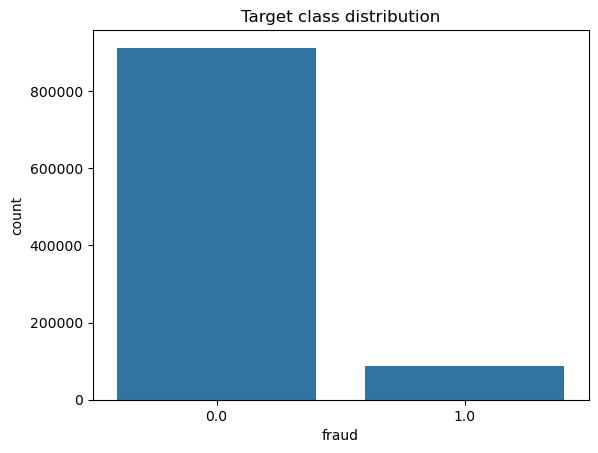

In [3]:
df.info()

# Check target distribution
target_col = 'fraud'
print(df[target_col].value_counts(normalize=True))

sns.countplot(x=target_col, data=df)
plt.title("Target class distribution")
plt.show()

In [4]:
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(800000, 7) (200000, 7)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.95941

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9634    0.9933    0.9781    182519
         1.0     0.8964    0.6056    0.7228     17481

    accuracy                         0.9594    200000
   macro avg     0.9299    0.7994    0.8505    200000
weighted avg     0.9575    0.9594    0.9558    200000



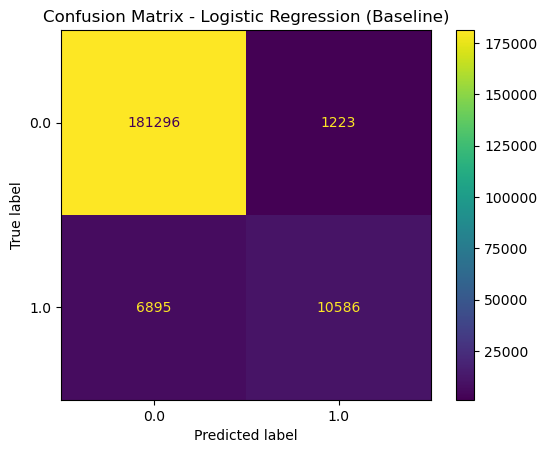

In [6]:
logit = LogisticRegression(max_iter=2000, n_jobs=-1)
logit.fit(X_train_scaled, y_train)

y_pred = logit.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Logistic Regression (Baseline)")
plt.show()

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

print("Class distribution after undersampling:", np.bincount(y_train_rus))

Class distribution after undersampling: [69922 69922]


In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

print("Class distribution after oversampling:", np.bincount(y_train_ros))

Class distribution after oversampling: [730078 730078]


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution after SMOTE:", np.bincount(y_train_sm))

Class distribution after SMOTE: [730078 730078]


=== Undersampling ===
Accuracy: 0.934785
              precision    recall  f1-score   support

         0.0     0.9946    0.9336    0.9631    182519
         1.0     0.5773    0.9475    0.7175     17481

    accuracy                         0.9348    200000
   macro avg     0.7860    0.9405    0.8403    200000
weighted avg     0.9582    0.9348    0.9417    200000



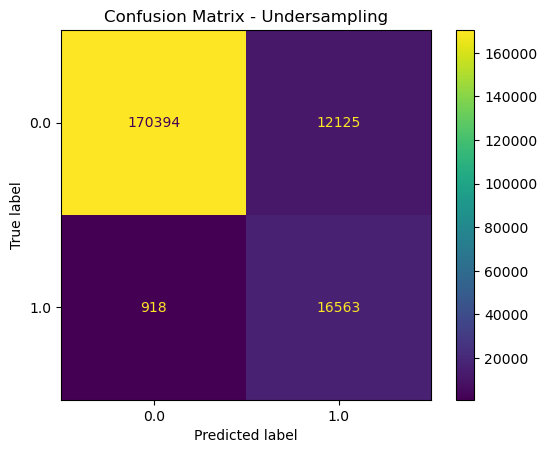

=== Oversampling ===
Accuracy: 0.9348
              precision    recall  f1-score   support

         0.0     0.9947    0.9335    0.9631    182519
         1.0     0.5774    0.9479    0.7176     17481

    accuracy                         0.9348    200000
   macro avg     0.7860    0.9407    0.8404    200000
weighted avg     0.9582    0.9348    0.9417    200000



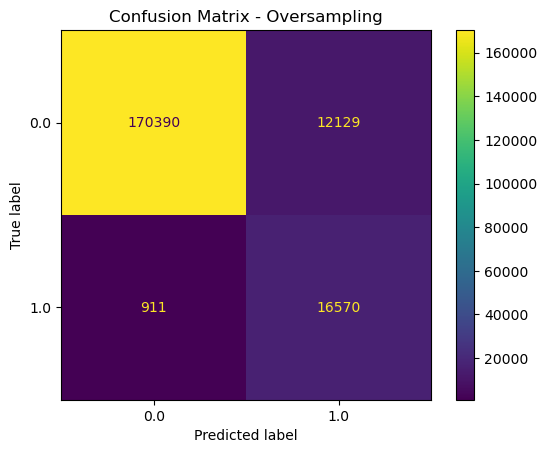

=== SMOTE ===
Accuracy: 0.9348
              precision    recall  f1-score   support

         0.0     0.9947    0.9335    0.9631    182519
         1.0     0.5774    0.9481    0.7177     17481

    accuracy                         0.9348    200000
   macro avg     0.7860    0.9408    0.8404    200000
weighted avg     0.9582    0.9348    0.9417    200000



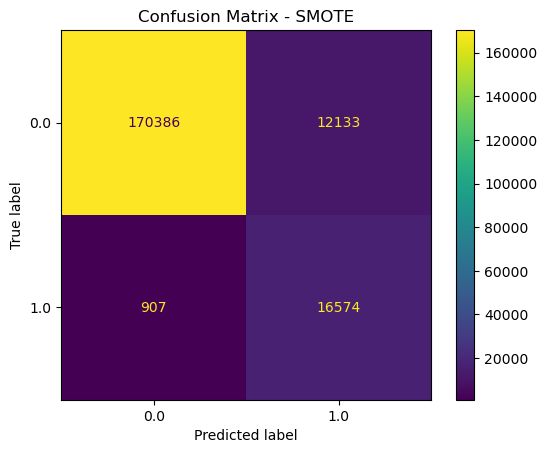

In [10]:
def evaluate_model(model, X_tr, y_tr, X_te, y_te, label=""):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    print(f"=== {label} ===")
    print("Accuracy:", accuracy_score(y_te, preds))
    print(classification_report(y_te, preds, digits=4))
    ConfusionMatrixDisplay.from_predictions(y_te, preds)
    plt.title(f"Confusion Matrix - {label}")
    plt.show()

logit = LogisticRegression(max_iter=2000, n_jobs=-1)

# On undersampled data
evaluate_model(logit, X_train_rus, y_train_rus, X_test_scaled, y_test, "Undersampling")

# On oversampled data
evaluate_model(logit, X_train_ros, y_train_ros, X_test_scaled, y_test, "Oversampling")

# On SMOTE data
evaluate_model(logit, X_train_sm, y_train_sm, X_test_scaled, y_test, "SMOTE")